<a href="https://colab.research.google.com/github/driskoe/BDSiC_FinalProject/blob/main/NeMO_MetaData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data


In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
#make sure to add the .txt file in
data = pd.read_csv('pacbio_deepdives_cells_unfiltered.txt', sep="\t", header=None)
#reformat so that column names are the values in the first row
data.rename(columns=lambda x: data[x][0], inplace=True)
data = data.iloc[1:]
#dropped region since it only contained 1 value (CD)
data = data.drop("REGION", axis = 1)
#convert numeric columns into integers since currently strings
numeric_columns = ["NREADS", "READLENGTH", "CAGLENGTH", "ALIGNSTART", "ALIGNEND"]
for column in numeric_columns:
  data[column] = pd.to_numeric(data[column], errors='coerce')

In [91]:
data.head()

,CELL_BARCODE,UMI,NREADS,READLENGTH,CAGLENGTH,CATEGORY,ALIGNSTART,ALIGNEND,DONOR,CELLTYPE
1,S05202_Caudate_DeepDive_rxn1_AATGGCTTCGTTGTTT,AAACAACGAAGCCATT.GTATAATCAGGC,918,769,43,EXON2,3074853.0,3075088.0,S05202,astrocyte
2,S05202_Caudate_DeepDive_rxn1_GTCTACCCAGGTGTTT,AAACACCTGGGTAGAC.ACATATTTGAAG,1130,690,15,EXON2,3074853.0,3075088.0,S05202,SPN
3,S05202_Caudate_DeepDive_rxn1_GACTATGGTCGAGTTT,AAACTCGACCATAGTC.CCTGACATTGGT,221,517,42,POLYA,3074853.0,3075088.0,S05202,polydendrocyte
4,S05202_Caudate_DeepDive_rxn1_TGTGCGGAGGGTCTTT,AAAGACCCTCCGCACA.AACCAAAAAATA,177,1106,42,EXON2,3074853.0,3075088.0,S05202,interneuron
5,S05202_Caudate_DeepDive_rxn1_AGATGAATCAGTCTTT,AAAGACTGATTCATCT.ATGGTTAATCCT,142,438,15,POLYA,3074853.0,3075088.0,S05202,microglia


#Exploratory Data Analysis

Unclear whether Align start and Align end are useful to us, so won't drop rows yet. Don't have the data such that imputation would be of any use. Category could probably drop if wanted since so few

In [86]:
data.isna().sum()

,0
CELL_BARCODE,0
UMI,0
NREADS,0
READLENGTH,0
CAGLENGTH,0
CATEGORY,3
ALIGNSTART,126
ALIGNEND,126
DONOR,0
CELLTYPE,0


In [87]:
for column in numeric_columns:
  print(column)
  print(data[column].max())

NREADS
13460
READLENGTH
3900
CAGLENGTH
842
ALIGNSTART
3074880.0
ALIGNEND
3297994.0


<ipython-input-96-bb87fe8a59c2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='CATEGORY', y='CAGLENGTH', palette='Set2')  # 'y' since it's a 1D distribution


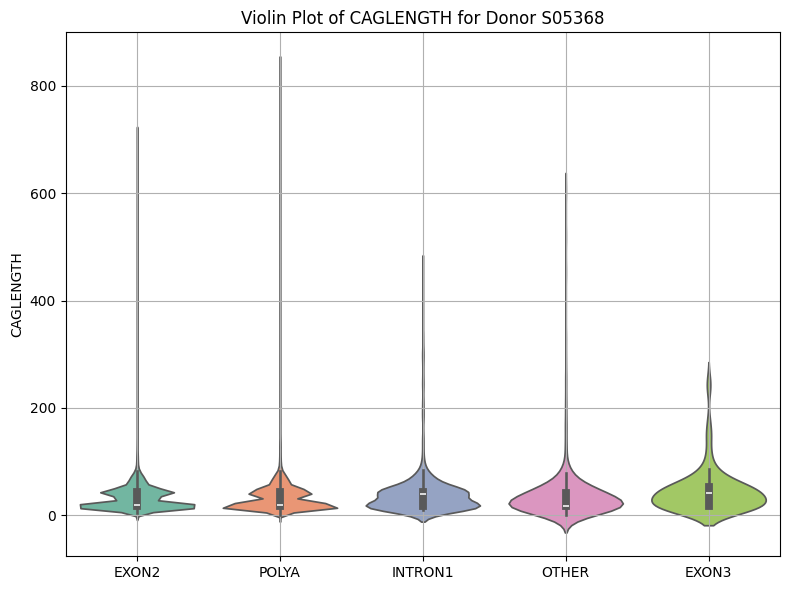

In [96]:
#graphs showing distribution of CAG counts across categories
plt.figure(figsize=(8, 6))
sns.violinplot(data=data, x='CATEGORY', y='CAGLENGTH', palette='Set2')  # 'y' since it's a 1D distribution

plt.title(f'Violin Plot of CAGLENGTH for Donor {donor}')
plt.ylabel('CAGLENGTH')
plt.xlabel('')  # No x-axis since it's only one category
plt.grid(True)
plt.tight_layout()
plt.show()


Don't konw why EXON 2 and POLYA, and to a lesser extent INTRON1 have a kind of bimodal distribution

<ipython-input-94-ef057caf841a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=filtered, x='CELLTYPE', order=all_cell_types, y='CAGLENGTH', palette='Set2')  # 'y' since it's a 1D distribution


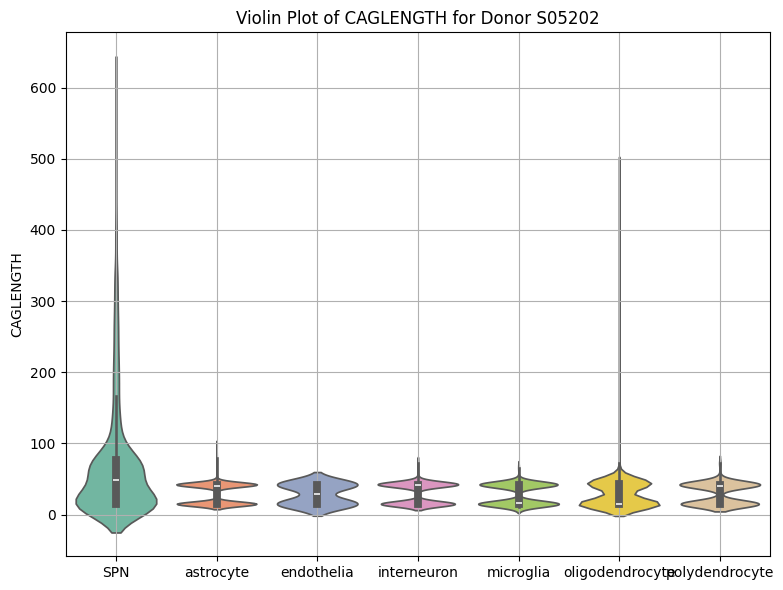

<ipython-input-94-ef057caf841a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=filtered, x='CELLTYPE', order=all_cell_types, y='CAGLENGTH', palette='Set2')  # 'y' since it's a 1D distribution


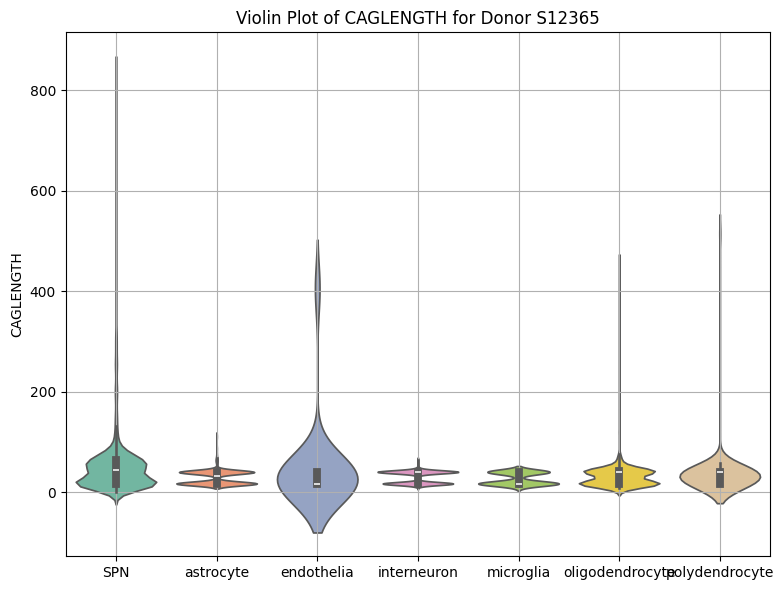

<ipython-input-94-ef057caf841a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=filtered, x='CELLTYPE', order=all_cell_types, y='CAGLENGTH', palette='Set2')  # 'y' since it's a 1D distribution


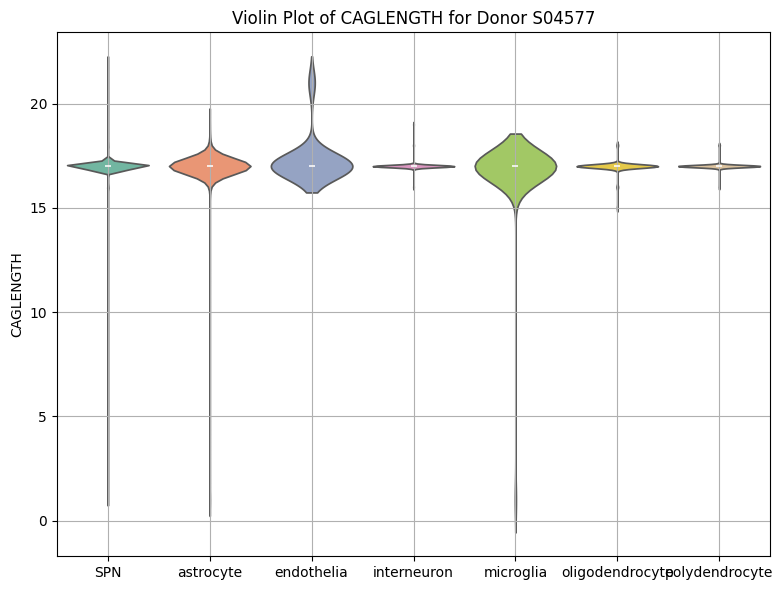

<ipython-input-94-ef057caf841a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=filtered, x='CELLTYPE', order=all_cell_types, y='CAGLENGTH', palette='Set2')  # 'y' since it's a 1D distribution


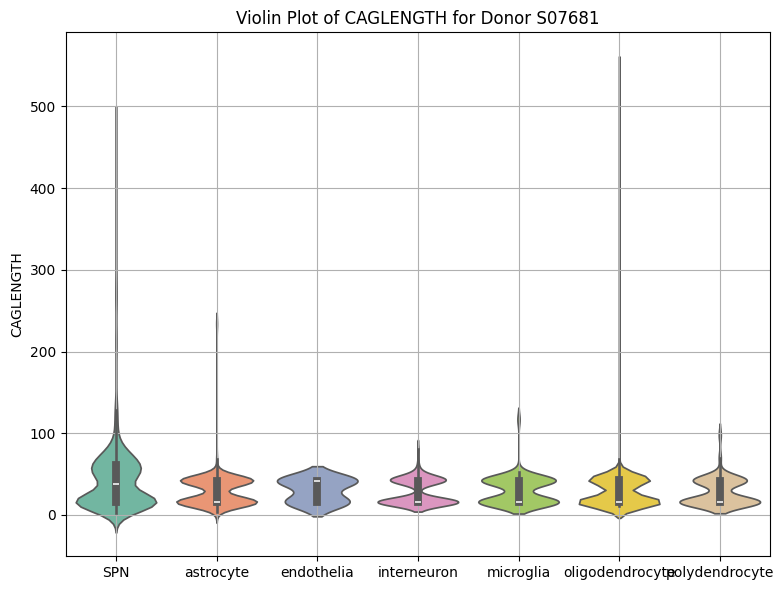

<ipython-input-94-ef057caf841a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=filtered, x='CELLTYPE', order=all_cell_types, y='CAGLENGTH', palette='Set2')  # 'y' since it's a 1D distribution


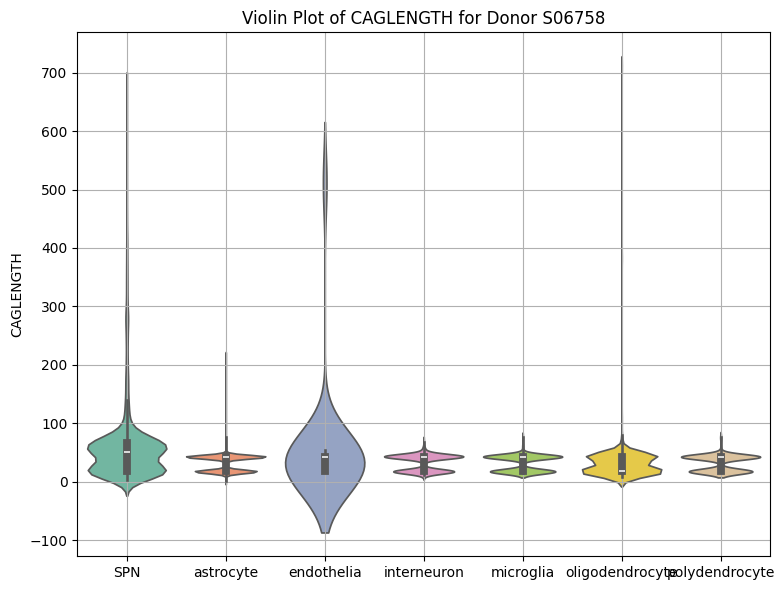

<ipython-input-94-ef057caf841a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=filtered, x='CELLTYPE', order=all_cell_types, y='CAGLENGTH', palette='Set2')  # 'y' since it's a 1D distribution


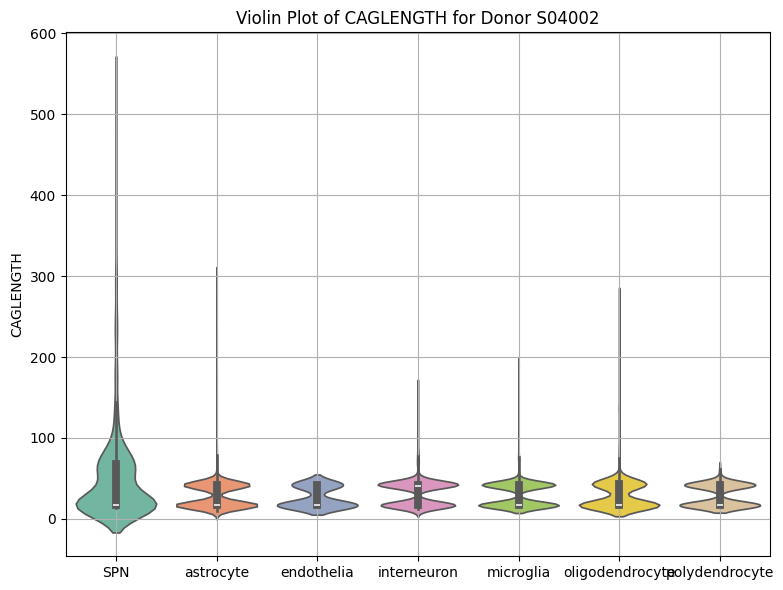

<ipython-input-94-ef057caf841a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=filtered, x='CELLTYPE', order=all_cell_types, y='CAGLENGTH', palette='Set2')  # 'y' since it's a 1D distribution


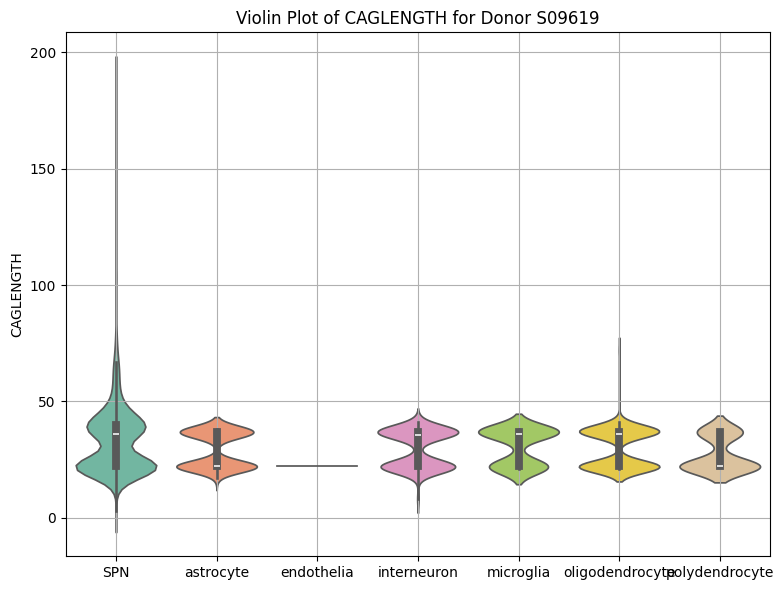

<ipython-input-94-ef057caf841a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=filtered, x='CELLTYPE', order=all_cell_types, y='CAGLENGTH', palette='Set2')  # 'y' since it's a 1D distribution


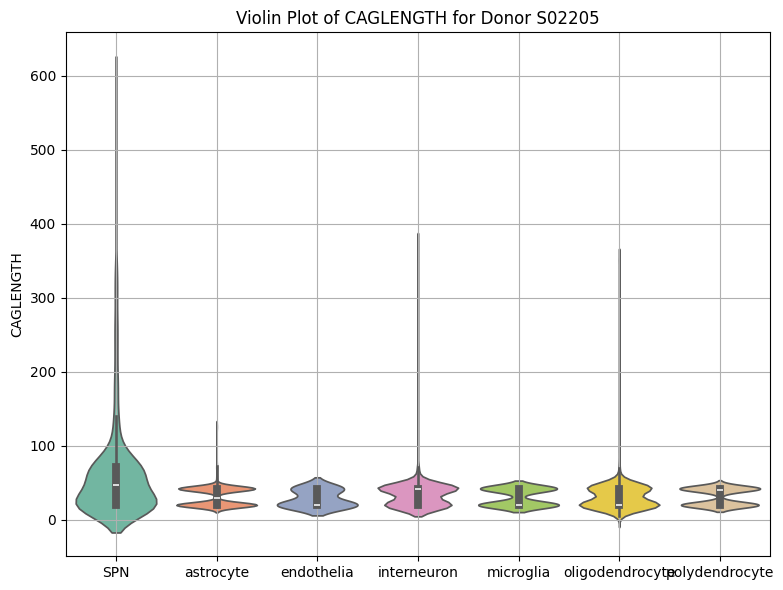

<ipython-input-94-ef057caf841a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=filtered, x='CELLTYPE', order=all_cell_types, y='CAGLENGTH', palette='Set2')  # 'y' since it's a 1D distribution


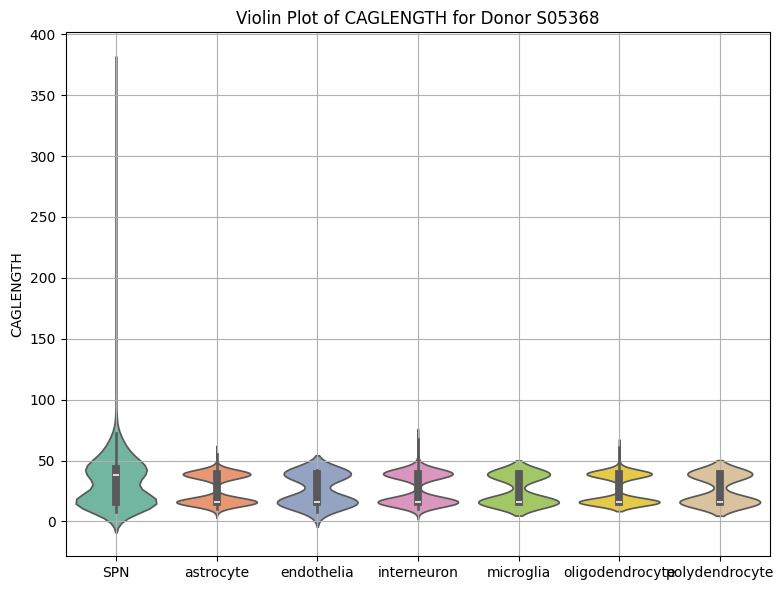

In [94]:
#graphs showing distribution within donors across cell types
all_cell_types = sorted(data['CELLTYPE'].unique())
for donor in data["DONOR"].unique():
  filtered = data[data["DONOR"] == donor]
  plt.figure(figsize=(8, 6))
  sns.violinplot(data=filtered, x='CELLTYPE', order=all_cell_types, y='CAGLENGTH', palette='Set2')  # 'y' since it's a 1D distribution

  plt.title(f'Violin Plot of CAGLENGTH for Donor {donor}')
  plt.ylabel('CAGLENGTH')
  plt.xlabel('')  # No x-axis since it's only one category
  plt.grid(True)
  plt.tight_layout()
  plt.show()


Interesting how Endothelial cells sometimes show a different shape. Non-SPN cells are pretty consistent in their distribution and really have stayed aroudn the same values for everything. They do have that like 2 peaks for their count which might have to do with introns vs. Exons. I can double check that in a second, though. We can kind of see different stages in the increase of SPNs based on all of this.
